In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
file_path = Path("Resource/myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [3]:
df_myopia.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [4]:
df_myopia.shape

(618, 15)

In [5]:
# Find null values
for column in df_myopia.columns:
    print(f"Column {column} has {df_myopia[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values
Column MYOPIC has 0 null values


In [6]:
print(f"Duplicate entries: {df_myopia.duplicated().sum()}")

Duplicate entries: 0


In [7]:
# Drop 'MYOPIC' column and view to check
df_myopia = df_myopia.drop(columns=["MYOPIC"])
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [8]:
# Standardise the data using StandardScaler
scaler = StandardScaler()

# Rename df
myopia_scaled = scaler.fit_transform(df_myopia)

In [9]:
myopia_scaled[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

In [10]:
# Dimensionality reduction with PCA
pca = PCA(n_components=.9)

# Principal components
# Direction in which the samples vary the most (displacement from the mean)
pca_myopia_scaled = pca.fit_transform(myopia_scaled)

In [11]:
pca_myopia_scaled.shape

(618, 10)

In [13]:
# Transform PCA data to a DataFrame
df_pca_myopia_scaled = pd.DataFrame(
    data=pca_myopia_scaled, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7","PC8","PC9", "PC10"]
)
df_pca_myopia_scaled.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [14]:
pca.explained_variance_

array([2.96963488, 2.19591352, 1.21829455, 1.16413033, 1.0636011 ,
       0.9812908 , 0.90965003, 0.89434022, 0.75633707, 0.72996042])

In [15]:
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [16]:
pca.explained_variance_ratio_.sum()

0.9187361702915187

#### Perform dimensionality reduction with PCA. How did the number of the features change?

##### The features were reduced by 4. There are 10 features with higher variance.

In [17]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca_myopia_scaled)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


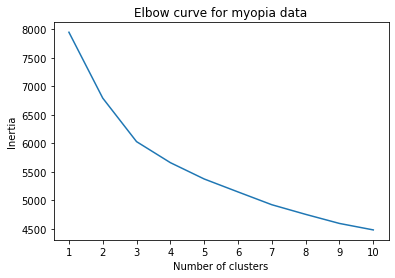

In [18]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopia data')
plt.show()

##### Doesn't seem to be a distinct optimal number of clusters. It looks like it might be between 3 to 5.

In [19]:
# k-means clustering with 3 clusters 
# Create k-means instance 
model_k = KMeans(n_clusters=3, random_state=5)

# Fit 
model_k.fit(pca_myopia_scaled)

# Cluster predictions
predictions = model_k.predict(pca_myopia_scaled)

# Add new class to elbow df 
df_pca_myopia_scaled["class"] = model_k.labels_

df_pca_myopia_scaled.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,1
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,2


<function matplotlib.pyplot.show(close=None, block=None)>

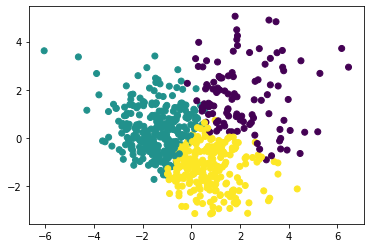

In [20]:
plt.scatter(x=df_pca_myopia_scaled["PC1"], 
            y=df_pca_myopia_scaled["PC2"], 
            c=df_pca_myopia_scaled["class"])
plt.show

In [21]:
# k-means clustering with 4 clusters 
# Create k-means instance 
model_k4 = KMeans(n_clusters=4, random_state=5)

# Fit 
model_k4.fit(pca_myopia_scaled)

# Cluster predictions
predictions = model_k4.predict(pca_myopia_scaled)

# Add new class to elbow df 
df_pca_myopia_scaled["class4"] = model_k4.labels_

df_pca_myopia_scaled.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,class,class4
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,1,3
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,2,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1,3
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,2,1


<function matplotlib.pyplot.show(close=None, block=None)>

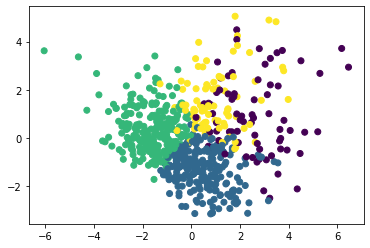

In [22]:
plt.scatter(x=df_pca_myopia_scaled["PC1"], 
            y=df_pca_myopia_scaled["PC2"], 
            c=df_pca_myopia_scaled["class4"])
plt.show

### Conclusion

##### It seems that patients can be split into 3 distinct clusters. 